In [64]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\3DTomoGAN")
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Results")

import utils
from PIL import Image


%reload_ext autoreload
%autoreload 2

In [65]:
loc = r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Results"
gt = np.asarray(Image.open(os.path.join(loc,'gt.png')), dtype=np.float32)
pred = np.asarray(Image.open(os.path.join(loc, 'it04000.png')), dtype=np.float32)

In [67]:
ssim = utils.calc_ssim(gt, pred)
psnr = utils.calc_psnr(gt, pred)

from ignite.metrics import SSIM, PSNR
import torch


metric = SSIM(data_range=255)
# metric.attach(default_evaluator, 'ssim')

print(metric.update((torch.from_numpy(pred).unsqueeze(0).unsqueeze(0), torch.from_numpy(gt).unsqueeze(0).unsqueeze(0))) )

noise = PSNR(data_range=255)

print(noise.update((torch.from_numpy(pred).unsqueeze(0).unsqueeze(0), torch.from_numpy(gt).unsqueeze(0).unsqueeze(0))) )



271.08887
271.08765
None
None


In [ ]:
print(ssim)
print(psnr)

0.0022152721860821682
29.218833378498303


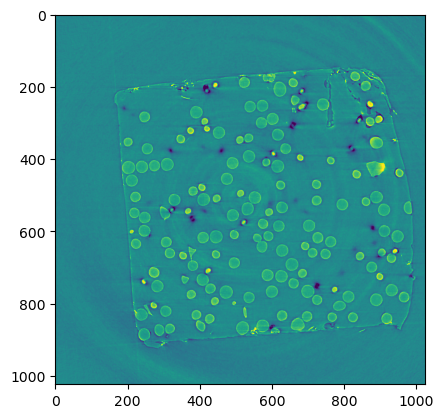

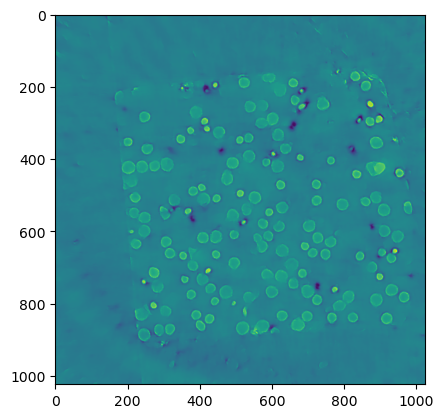

In [54]:
plt.imshow(gt)
plt.show()
plt.imshow(pred)
plt.show()